<a href="https://colab.research.google.com/github/WestHamster/100DAYSOFML/blob/master/Day-5(Kaggle-tmdb_challenge).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sn

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

import warnings
warnings.filterwarnings('ignore')

# Any results you write to the current directory are saved as output.

sample_submission.csv
test.csv
train.csv



In [0]:
df = pd.read_csv('../input/train.csv')
#df = df.dropna()
df.shape

(3000, 23)

In [0]:
#df = df.dropna()
df.columns
print(df.shape)
df.head()

(3000, 23)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


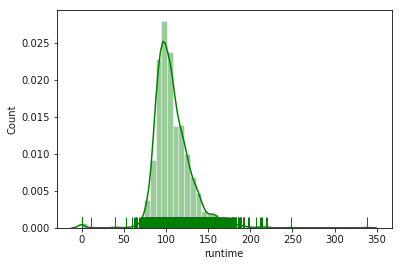

In [0]:
runtime_val = df.runtime
count = len(runtime_val)
runtime_val = runtime_val.sort_values()
runtime_val = runtime_val.dropna()
plt.xlabel('Runtime')
plt.ylabel('Count')
sn.set(style='darkgrid')
sn.distplot(runtime_val,kde=True,rug=True,color='green')
plt.show()

In [0]:
df.status.value_counts()
df.status.factorize()[0]

array([0, 0, 0, ..., 0, 0, 0])

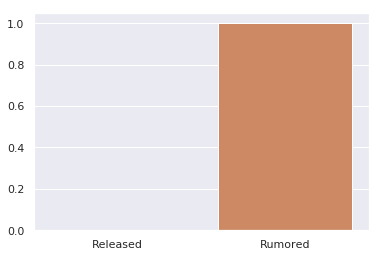

In [0]:
released = len(df.status=='Released')
rumor = len(df.status=='Rumored')

label = ['Released','Rumored']
li = [released,rumor]

index = np.arange(len(label))

sn.barplot(label,index)
plt.show()

In [0]:
tag = df.tagline
tag = tag.dropna()
print(tag.shape)
plot = df.overview
plot = plot.dropna()
print(plot.shape)

(2403,)
(2992,)


In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords

tfidf = TfidfVectorizer(sublinear_tf=True,min_df=6,encoding='latin-1',ngram_range=(1,2),stop_words='english')
tfidf1 = TfidfVectorizer(sublinear_tf=True,min_df=10,encoding='latin-1',ngram_range=(1,3),stop_words='english')

features = tfidf.fit_transform(tag)
features_overview = tfidf1.fit_transform(plot)
points = tfidf.vocabulary_
most_freq = tfidf1.vocabulary_
print('TAGLINE: ->')
print(points)
print()

TAGLINE: ->
{'space': 285, 'time': 311, 'lifetime': 179, 'true': 318, 'love': 194, 'got': 121, 'days': 59, 'fear': 93, 'doesn': 72, 'god': 115, 'different': 69, 'set': 279, 'life': 177, 'million': 208, 'look': 189, 'looking': 190, 'big': 22, 'hit': 141, 'perfect': 237, 'comes': 43, 'game': 109, 'mistake': 212, 'hell': 135, 'takes': 302, 'greatest': 123, 'story': 294, 'tell': 305, 'best': 18, 'danger': 53, 'hide': 138, 'killer': 163, 'new': 226, 'mind': 209, 'friends': 104, 'good': 120, 'evil': 85, 'imagination': 149, 'father': 92, 'meet': 204, 'today': 313, 'world': 347, 'forever': 99, 'people': 236, 'came': 30, 'saw': 267, 'deadly': 61, 'happen': 128, 'finally': 97, 'happened': 129, 've': 326, 'make': 199, 'best friends': 19, 'coming': 44, 'age': 4, 'come': 41, 'romance': 260, 'mystery': 221, 'away': 10, 'movie': 218, '000': 0, 'laughs': 168, 'lost': 192, 'sea': 272, 'year': 350, 'old': 231, 'witness': 343, 'changed': 35, 'human': 147, 'history': 140, 'courage': 50, 'honor': 144, 'mon

In [0]:
print('OVERVIEW: ->')
print(most_freq)

OVERVIEW: ->
{'father': 552, 'internet': 780, 'shot': 1349, 'unknown': 1591, 'nick': 1036, 'time': 1520, 'machine': 921, 'save': 1287, 'friend': 613, 'college': 287, 'way': 1645, 'princess': 1143, 'best': 144, 'joins': 815, 'summer': 1449, 'continues': 315, 'lessons': 877, 'royal': 1270, 'complicated': 304, 'life': 880, 'turned': 1565, 'upside': 1598, 'learns': 868, 'queen': 1168, 'earlier': 455, 'best friend': 145, 'ruthless': 1277, 'talented': 1471, 'young': 1703, 'begins': 136, 'cost': 329, 'humanity': 745, 'arrives': 87, 'london': 896, 'missing': 983, 'husband': 751, 'seven': 1335, 'months': 994, 'pregnant': 1133, 'city': 268, 'search': 1299, 'memories': 963, 'clues': 282, 'reach': 1184, 'dead': 376, 'end': 479, 'tries': 1551, 'convince': 320, 'does': 432, 'slowly': 1365, 'lies': 879, 'determined': 405, 'unravel': 1593, 'truth': 1561, 'child': 252, 'marine': 940, 'boy': 174, 'story': 1420, 'national': 1017, 'finds': 582, 'gangster': 625, 'boss': 171, 'drugs': 451, 'sea': 1298, 'fri

In [0]:
df.revenue.shape                # Our TF-IDF values for our list

(3000,)

In [0]:
features.shape

(2403, 353)

In [0]:
box_office = df.revenue >999999
box_office.value_counts()

## THESE MOVIES ARE AT A STANDARD BOX-OFFICE EARNINGS

True     2450
False     550
Name: revenue, dtype: int64

In [0]:
genre = df.genres

In [0]:
"""import ast
df['genres'] = df['genres'].dropna()
df['genres'] = df['genres'].apply(ast.literal_eval)
df['genre_type'] = df['genres'].apply(lambda x: x[0].get('name'))


genres = [w for w in df.genres]"""

"import ast\ndf['genres'] = df['genres'].dropna()\ndf['genres'] = df['genres'].apply(ast.literal_eval)\ndf['genre_type'] = df['genres'].apply(lambda x: x[0].get('name'))\n\n\ngenres = [w for w in df.genres]"

In [0]:
df.corr()

,id,budget,popularity,runtime,revenue
id,1.000000,0.019732,-0.007470,0.010750,0.000610
budget,0.019732,1.000000,0.342356,0.238373,0.752965
popularity,-0.007470,0.342356,1.000000,0.133690,0.461460
runtime,0.010750,0.238373,0.133690,1.000000,0.216380
revenue,0.000610,0.752965,0.461460,0.216380,1.000000


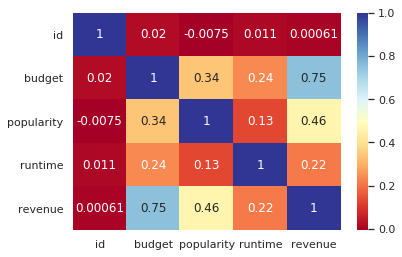

In [0]:
sn.heatmap(df.corr(),cmap = 'RdYlBu',annot=True)

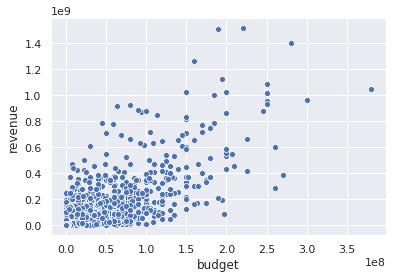

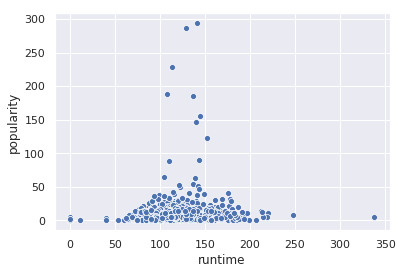

In [0]:
sn.scatterplot(df.budget,df.revenue)
plt.show()
sn.scatterplot(df.runtime,df.popularity)
plt.show()

In [0]:
import ast
import itertools
from collections import Counter
from wordcloud import WordCloud,STOPWORDS
from nltk.tokenize import word_tokenize
stopwords=set(STOPWORDS)
size = plot.shape
print(size)
word = []
respo = pd.DataFrame(df.genres)
respo = df.genres.apply(lambda x: list(map(lambda d: list(d.values())[1], ast.literal_eval(x)) if isinstance(x, str) else []))
respo_count = Counter(itertools.chain.from_iterable(respo))
print()
print("Total number of genres:",len(respo_count))
print("Genre frequency:\n"+'\n'.join(['{} : {}'.format(g, respo_count[g]) for g in respo_count]))


(2992,)

Total number of genres: 20
Genre frequency:
Comedy : 1028
Drama : 1531
Family : 260
Romance : 571
Thriller : 789
Action : 741
Animation : 141
Adventure : 439
Horror : 301
Documentary : 87
Music : 100
Crime : 469
Science Fiction : 290
Mystery : 225
Foreign : 31
Fantasy : 232
War : 100
Western : 43
History : 132
TV Movie : 1


In [0]:
## CAST IN ORDERS OF APPEARANCE

casting = df.cast.apply(lambda y:list(map(lambda e:list(e.values())[5],ast.literal_eval(y)) if isinstance(y,str) else []))
cast_count = Counter(itertools.chain.from_iterable(casting))

##**************************** IF YOU WANT TO FIND THE MOST APPEARED ACTOR/ACTRESS, RUN THE LINE BELOW***********************#
#print(cast_count.most_common())
print()
print(len(cast_count))


38588


In [0]:
df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [0]:
from sklearn.model_selection import train_test_split

y_val = df.revenue
Y= y_val.apply(np.log10)
feat_movie  = ['budget','popularity','runtime']
feat = df[feat_movie]

X_train, X_test, Y_train, Y_test = train_test_split(feat,Y, test_size=0.2,random_state=4)

In [0]:
params = {'objective':'regression',
          'num_leaves' : 40,
          'min_data_in_leaf' : 20,
          'max_depth' : 6,
          'learning_rate': 0.001,
          "metric": 'rmse',
          "random_state" : 42,
          "lambda_l2" : 0.005,
          "verbosity": -1}

In [0]:
import lightgbm as lgbm

lgbm_train = lgbm.Dataset(X_train,Y_train)
lgbm_eval = lgbm.Dataset(X_test,Y_test,reference = lgbm_train)
X_train.shape

(2400, 3)

In [0]:
print("TRAINING: ")

gbm = lgbm.train(params,lgbm_train,num_boost_round=3000,valid_sets = lgbm_eval,early_stopping_rounds=15)

TRAINING: 
[1]	valid_0's rmse: 1.31644
Training until validation scores don't improve for 15 rounds.
[2]	valid_0's rmse: 1.31585
[3]	valid_0's rmse: 1.31527
[4]	valid_0's rmse: 1.31468
[5]	valid_0's rmse: 1.3141
[6]	valid_0's rmse: 1.31351
[7]	valid_0's rmse: 1.31293
[8]	valid_0's rmse: 1.31235
[9]	valid_0's rmse: 1.31177
[10]	valid_0's rmse: 1.31119
[11]	valid_0's rmse: 1.31061
[12]	valid_0's rmse: 1.31003
[13]	valid_0's rmse: 1.30946
[14]	valid_0's rmse: 1.30888
[15]	valid_0's rmse: 1.3083
[16]	valid_0's rmse: 1.30773
[17]	valid_0's rmse: 1.30715
[18]	valid_0's rmse: 1.30658
[19]	valid_0's rmse: 1.30601
[20]	valid_0's rmse: 1.30544
[21]	valid_0's rmse: 1.30487
[22]	valid_0's rmse: 1.3043
[23]	valid_0's rmse: 1.30373
[24]	valid_0's rmse: 1.30316
[25]	valid_0's rmse: 1.3026
[26]	valid_0's rmse: 1.30203
[27]	valid_0's rmse: 1.30147
[28]	valid_0's rmse: 1.30091
[29]	valid_0's rmse: 1.30034
[30]	valid_0's rmse: 1.29979
[31]	valid_0's rmse: 1.29923
[32]	valid_0's rmse: 1.29868
[33]	valid_0